# 1-Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 11-Importation et préparation des données soi.tsv

In [2]:
# Vérifier l'apparence du fichier
with open("soi.tsv", "r",encoding="latin-1") as f:
    content = f.read()
print(content)

1.53716	0.922168	-0.104204	-0.291903	-0.658745	0.172287	-1.01062	-0.224433	-1.07643	-0.972327	-0.770102	-0.740707	-0.891187	-0.603337	0.521818	-0.249924	0.754485	0.744746	0.493	0.0511044	-0.214278	0.386053	0.002948	-1.21634	0.284623	-0.498785	-0.170639	0.196599	-1.69189	0.101991	-0.000650392	-1.18599	-1.24613	0.0530912	-0.286749	-0.462596	0.685307	-0.284534	0.261726	0.640549	0.489245	0.104565	0.393598	1.0791	0.163238	0.26863	0.145616	1.37914	-0.536842	1.90432	0.649539	-0.124778	1.03389	1.30097	1.58099	1.45919	1.30093	1.5186	1.23618	0.990039	1.32935	1.62363	1.34328	0.90064	1.41269	1.08157	1.10536	1.19009	0.0625472	1.78126	0.150765	1.06935	0.611149	-0.0586977	0.206876	0.242439	-0.663894	0.155554	0.226473	-0.493534	-0.923468	0.0440809	-0.988215	-0.296758	-1.87849	-0.496211	0.256578	0.357288	-0.485185	0.274264	0.393598	0.920983	-0.31368	0.0685367	-0.443576	-0.625858	-0.883464	-1.37381	1.28972	0.410851	0.485384	-0.116122	-0.263316	-0.11602	0.00254869	0.485456	0.913518	0.902221	0.129083	0.09

In [3]:
# Importer le fichier en csv
path = "soi.tsv"

df = pd.read_csv(
    path,
    header = None, 
    sep = '\t',

)

s = df.stack().reset_index(drop=True)   # <- IMPORTANT: drop=True
s.name = "Southern_oscillation"

In [4]:
# Présence de nan
print(s.dtypes)
print(s.isnull().sum())

float64
0


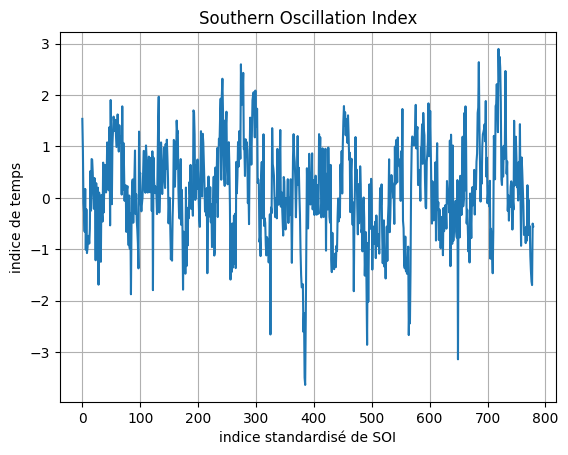

In [5]:
# Plotter la série temporelle
plt.figure()
s.plot()
plt.title("Southern Oscillation Index")
plt.xlabel("indice standardisé de SOI")
plt.ylabel("indice de temps")
plt.grid(True)

Le SOI mesure comment la pression de l'air varie entre Tahiti et Darwin : 
- Autour de 0, la pression est neutre. 
- Quand l’écart de pression est plus grand que la normale → on est en tendance La Niña.
- Quand l’écart est plus petit que la normale (ou inversé) → on est en tendance El Niño.

Vu que c'est une variable temporelle de croissance, la tendance elle est constante. Vérifions maintenant si c'est stationnaire. 

# 2. Analyse de l'autocorrélation

In [6]:
# Test de stationnarité
s_adfuller = adfuller(s)
print(s_adfuller)
s_adfuller_p_value = s_adfuller[1]
print(s_adfuller_p_value)
if s_adfuller_p_value < 0.05 : 
    print("on rejette H0, la série est stationnaire")
else : 
    print("il n'y a pas suffisamment de preuve pour rejetter H0")

(np.float64(-7.502543292317648), np.float64(4.21630297019212e-11), 2, 777, {'1%': np.float64(-3.4387940607132887), '5%': np.float64(-2.8652669182555943), '10%': np.float64(-2.5687545755297494)}, np.float64(1610.2252214204245))
4.21630297019212e-11
on rejette H0, la série est stationnaire


Nous pouvons donc passer à l'analyse de l'autocorrélation

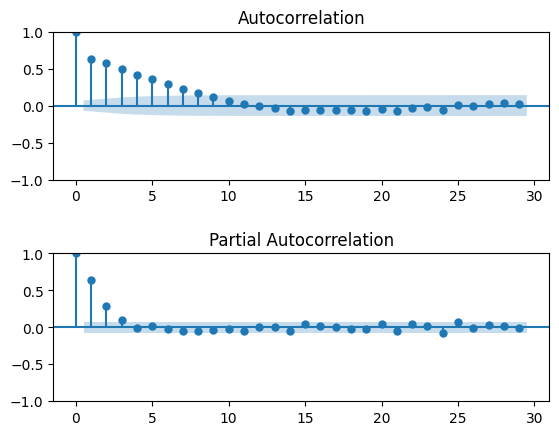

In [9]:
# ACF et PACF
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
plot_acf(s, ax=ax1) 
ax2 = fig.add_subplot(2,1,2)
plot_pacf(s, ax=ax2)
plt.subplots_adjust(hspace=0.5)
plt.show()

L'autoccorélation mesure l'intensité de relation entre le lags. Le partical autocorrélation mesure toujours cette intensité mais corrigé des cumuls des autres relations. 

Nous venons de voir que la série temporelle présente environ 09 nombre de retards qui sont liés entre eux. Ce qui signifie qu'un modèle auto-régressif est idéal pour modéliser SOI. Le nombre retards optimal peut être entre 1 à 4. 

Nous allons appliquer : 
- AR
- ARIMA
- ARCH
- GARCH

# Split des données

In [ ]:
print(s.dtype)

dtype('float64')

In [ ]:
n = len

# Modèle AR()